In [18]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('concreate.csv')

In [7]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
x = df.drop('Strength',axis=1)
y = df['Strength']

In [13]:
x.sample()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
57,198.6,132.4,0.0,192.0,0.0,978.4,825.5,3


C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_9496\2920792931.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_9496\2920792931.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_9496

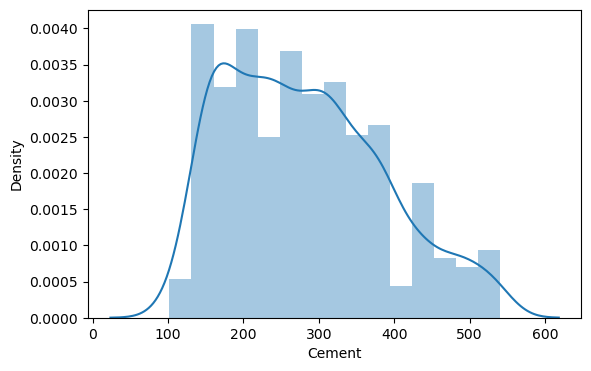

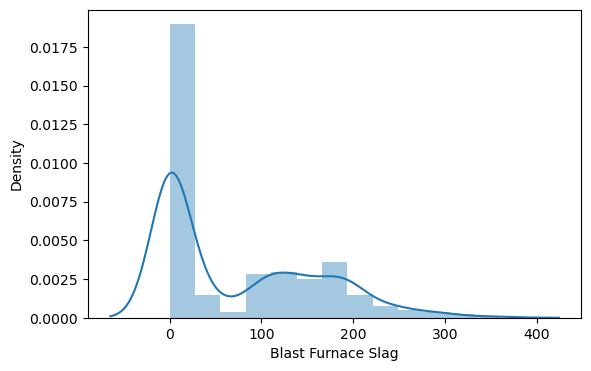

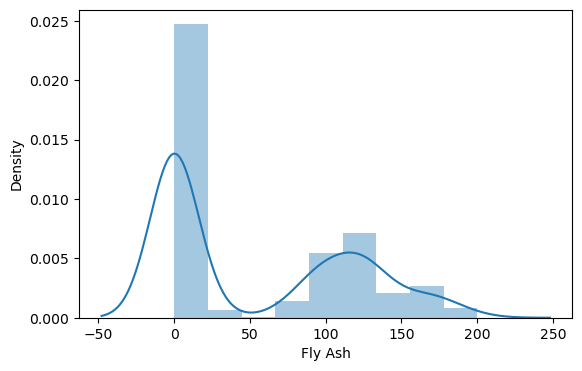

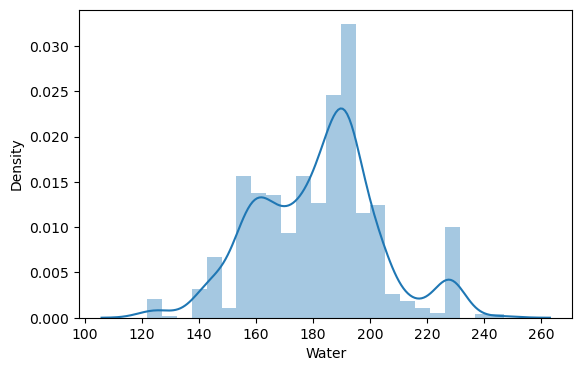

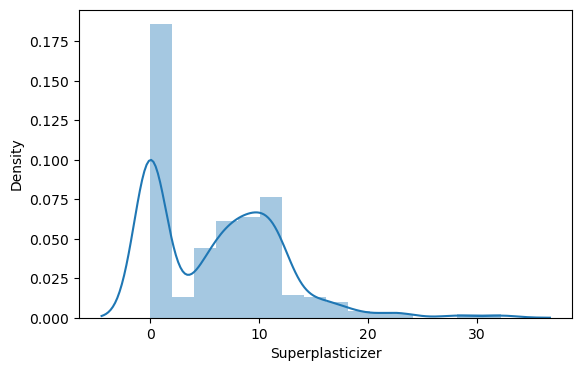

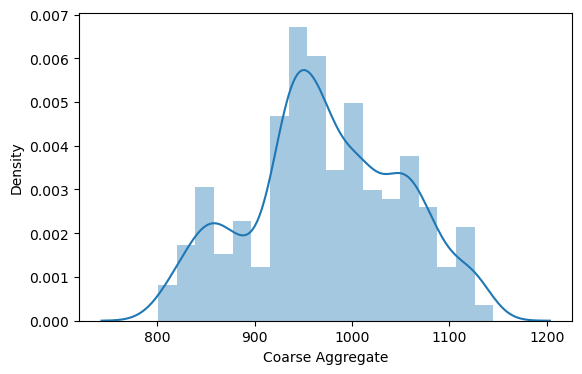

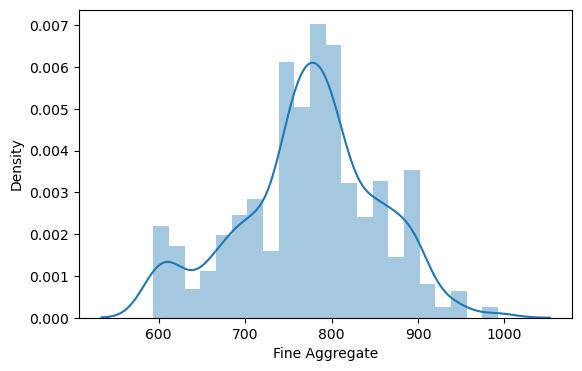

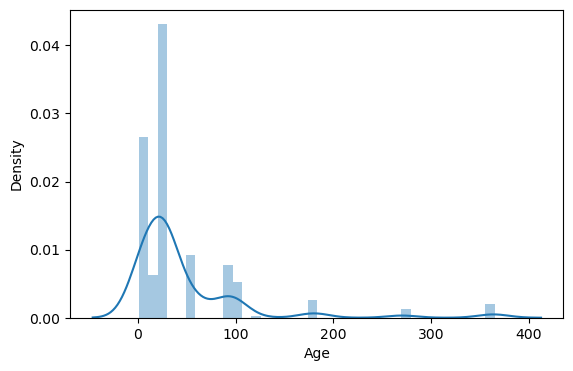

In [24]:
for col in x.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])

#### LIST OF TRANSFORMING COLUMNS:
      1) Blast Furnace Slag
      2) Superplasticizer
      3) Age

In [26]:
kbin_blast = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_super = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [30]:
trf = ColumnTransformer([
    ('first',kbin_blast,[1]),
    ('second',kbin_super,[4]),
    ('third',kbin_age,[7])
],remainder='passthrough')

In [31]:
x_trf = trf.fit_transform(x)

D:\harsh\anaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
D:\harsh\anaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
D:\harsh\anaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [39]:
col_trf = pd.DataFrame({
    'age_trf':x_trf[7],
    'super_trf':x_trf[4],
    'blast_trf':x_trf[1]
    
})

In [40]:
col_trf

,age_trf,super_trf,blast_trf
0,1.0,3.0,0.0
1,0.0,0.0,0.0
2,4.0,6.0,4.0
3,380.0,198.6,540.0
4,0.0,0.0,0.0
5,228.0,192.0,162.0
6,932.0,978.4,1055.0
7,594.0,825.5,676.0


C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_9496\3497614528.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x['Age'])
C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_9496\3497614528.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col_trf['age_trf'])
C:\Users\Mrunmay\AppData\Local\Temp\ip

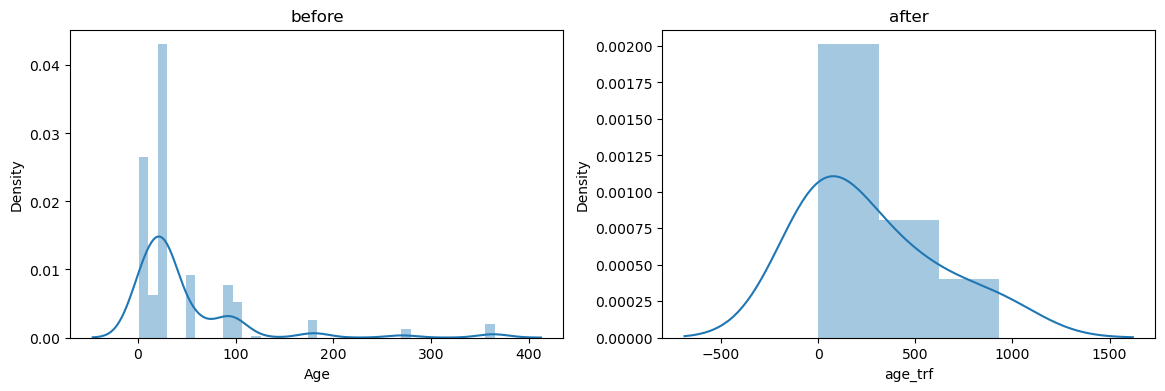

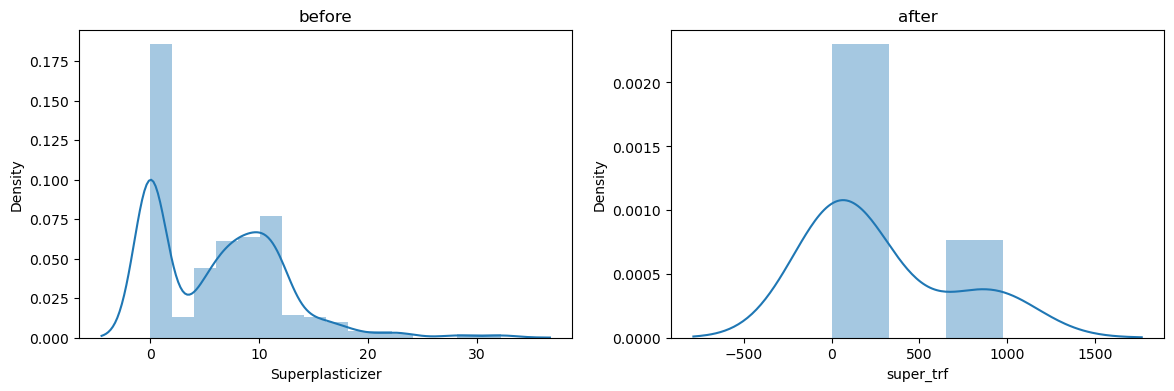

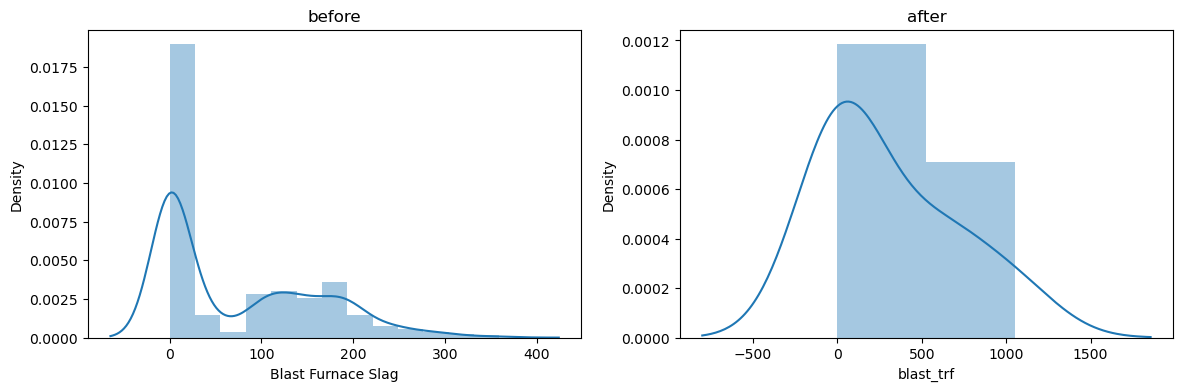

In [44]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x['Age'])
plt.title('before')

plt.subplot(122)
sns.distplot(col_trf['age_trf'])
plt.title('after')

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x['Superplasticizer'])
plt.title('before')


plt.subplot(122)
sns.distplot(col_trf['super_trf'])
plt.title('after')


plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x['Blast Furnace Slag'])
plt.title('before')

plt.subplot(122)
sns.distplot(col_trf['blast_trf'])
plt.title('after')

plt.show()